### Caly and Ryogo

# Lab 2

## Exercise 1
In the cell below is a function with one required input (temperature in Kelvin) that will return the values for a Planck function. Comment each line in the cell below with a bit of text explaining what that line does. Reminder: comments in python have the # symbol before them.

In [1]:
#this is a comment

#imports units
import astropy.units as u
#import constants
from astropy.constants import G, h, c, k_B
#import numpy
import numpy as np

# creates a function
def planck_func(temp):
    # creates array of wavelength in nm ranging from 1 to 100k increments of 1
    lambdas = (np.arange(1,100000,1))*u.nm
    # add K unit to the input temperature
    T = temp*u.K
    # planck function
    bs = 2*h*c**2/lambdas**5*(1/(np.exp(h*c/(lambdas*k_B*T))-1))
    # make unit of the result fundamental units
    bs.decompose()
    # make the unit of the result to W/m^2/nm
    bs = bs.to(u.W/u.m**2/u.nm)
    # make 2 x 100k array for wavelengths, and spectral radience for each wavelength
    Planck=np.array([lambdas,bs])
    #return the 2 x 100k array
    return(Planck)

You can now create a variable that is a list of values corresponding to the value of the Planck function over the range of wavelengths specified in the function, as in the cell below.

In [2]:
star1 = planck_func(6000)

/usr/local/lib/python3.10/dist-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


## Exercise 2
Use the output of the function to make a plot with appropriate labels (including units) and legend that shows the difference between a 6000K (sun-like) star's blackbody curve and those of stars that are slightly warmer (7000K) and cooler (5000K). Manipulate the x and/or y range of the plot to zoom in on the curves as much as you can while showing all three.

*Reminder/Hint: Since the function returns a 2 x 10000 element matrix you may  need to use array indices in your plot command. Remember that python array indices start from 0.*

In [3]:
#define your variables to be plotted (outputs from the function) here

temp1 = 6000
temp2 = 5000
temp3 = 7000

star1 = planck_func(temp1)
star2 = planck_func(temp2)
star3 = planck_func(temp3)

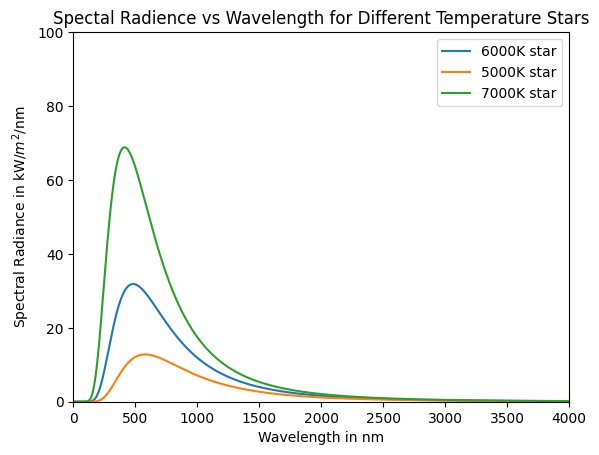

In [4]:
import matplotlib.pyplot as plt  # this imports the plotting package


plt.plot(star1[0,:],star1[1,:]/1000,label='6000K star')
plt.plot(star2[0,:],star2[1,:]/1000, label='5000K star')
plt.plot(star3[0,:],star3[1,:]/1000, label= '7000K star')
plt.axis([0,4000,0,100])
plt.legend(loc='upper right')
plt.xlabel('Wavelength in nm')
plt.ylabel('Spectral Radiance in kW/$m^{2}$/nm')
plt.title('Spectal Radience vs Wavelength for Different Temperature Stars')
plt.show()
#insert your plot commands here
#divide flux by 1000 to plot kW instead of W as units - makes it look nicer

In [5]:
print('area under 6000K star is ',np.trapz(star1[1,:]/1000,star1[0,:]), ' in kW/m^2')
print('area under 5000K star is ',np.trapz(star2[1,:]/1000,star2[0,:]), ' in kW/m^2')
print('area under 7000K star is ',np.trapz(star3[1,:]/1000,star3[0,:]), ' in kW/m^2')

area under 6000K star is  23391.95721001867  in kW/m^2
area under 5000K star is  11280.837825900562  in kW/m^2
area under 7000K star is  43336.49985830651  in kW/m^2


## Exercise 3
Write a few sentences describing the differences between the areas under these three curves and what that means about their total energy output. Be as quantitative as possible by estimating the area underneath them.

The area under the curve increases as the temperature of a star increases. We guess that the increase is according to the power law. The calculation for each flx is above. The total energy also increases as the temperature increases because flux has energy in numerator.

### Submission Instructions

Before submitting any Google Colab notebook for grading, please follow the following steps

**1) Try running everything in one go (Runtime menu -> Restart and run all)**

Make sure the entire notebook runs from start to finish. If necessary, comment out any un-executable cells from the instructions portion of the lab so the whole notebook will execute in one go.

**2) Restart the kernel (Runtime menu --> Restart Runtime).**

**3) Clear all output (Edit --> clear all outputs).**

**4) Make sure the names of all group members are in a markdown cell at the top of the file and submit the notebook as a *.ipynb file on Gradescope**